In [0]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("MyKmeans").getOrCreate()

# Now you can use Spark and PySpark APIs


In [0]:
# Load the CSV file into a DataFrame
df = spark.read.csv("/FileStore/tables/MyOnlineRetail.csv", header=True, inferSchema=True)

# Show the DataFrame
df.show()


+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|revenue|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2010 8:26|     2.55|     17850|United Kingdom|   15.3|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2010 8:26|     3.39|     17850|United Kingdom|  20.34|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2010 8:26|     2.75|     17850|United Kingdom|   22.0|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2010 8:26|     3.39|     17850|United Kingdom|  20.34|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2010 8:26|     3.39|     17850|United Kingdom|  20.34|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|1/12/2010 8:26|     7.65|     17850|United Kingdom|   15.3|
|

In [0]:
#cache the dataframe
df.cache()
df.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|revenue|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2010 8:26|     2.55|     17850|United Kingdom|   15.3|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2010 8:26|     3.39|     17850|United Kingdom|  20.34|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2010 8:26|     2.75|     17850|United Kingdom|   22.0|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2010 8:26|     3.39|     17850|United Kingdom|  20.34|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2010 8:26|     3.39|     17850|United Kingdom|  20.34|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|1/12/2010 8:26|     7.65|     17850|United Kingdom|   15.3|
|

In [0]:
#checking datatypes of each field
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- revenue: double (nullable = true)



In [0]:
#check for null data
from pyspark.sql.functions import count, when, isnull

# Check for null values in the DataFrame
null_counts = df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).collect()[0]

# Print the null counts for each column
for column in df.columns:
    print(f"Column {column} has {null_counts[column]} null values")


Column InvoiceNo has 0 null values
Column StockCode has 0 null values
Column Description has 1454 null values
Column Quantity has 0 null values
Column InvoiceDate has 0 null values
Column UnitPrice has 0 null values
Column CustomerID has 135080 null values
Column Country has 0 null values
Column revenue has 0 null values


In [0]:
df.count()

Out[7]: 541909

In [0]:
# Drop null records of the "col1" column in place
df=df.dropna(subset=["CustomerID"])

# Show the resulting DataFrame

df.count()


Out[9]: 406829

In [0]:
#nulls have been removed and count of non null records displayed and now let us view the dataframe
df.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|revenue|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+-------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2010 8:26|     2.55|     17850|United Kingdom|   15.3|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2010 8:26|     3.39|     17850|United Kingdom|  20.34|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2010 8:26|     2.75|     17850|United Kingdom|   22.0|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2010 8:26|     3.39|     17850|United Kingdom|  20.34|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2010 8:26|     3.39|     17850|United Kingdom|  20.34|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|1/12/2010 8:26|     7.65|     17850|United Kingdom|   15.3|
|

In [0]:
display(df)
df.count()

InvoiceNo StockCode Description Quantity InvoiceDate UnitPrice CustomerID Country revenue 536365 85123A WHITE HANGING HEART T-LIGHT HOLDER 6 1/12/2010 8:26 2.55 17850 United Kingdom 15.3 536365 71053 WHITE METAL LANTERN 6 1/12/2010 8:26 3.39 17850 United Kingdom 20.34 536365 84406B CREAM CUPID HEARTS COAT HANGER 8 1/12/2010 8:26 2.75 17850 United Kingdom 22.0 536365 84029G KNITTED UNION FLAG HOT WATER BOTTLE 6 1/12/2010 8:26 3.39 17850 United Kingdom 20.34 536365 84029E RED WOOLLY HOTTIE WHITE HEART. 6 1/12/2010 8:26 3.39 17850 United Kingdom 20.34 536365 22752 SET 7 BABUSHKA NESTING BOXES 2 1/12/2010 8:26 7.65 17850 United Kingdom 15.3 536365 21730 GLASS STAR FROSTED T-LIGHT HOLDER 6 1/12/2010 8:26 4.25 17850 United Kingdom 25.5 536366 22633 HAND WARMER UNION JACK 6 1/12/2010 8:28 1.85 17850 United Kingdom 11.1 536366 22632 HAND WARMER RED POLKA DOT 6 1/12/2010 8:28 1.85 17850 United Kingdom 11.1 536367 84879 ASSORTED COLOUR BIRD ORNAMENT 32 1/12/2010 8:34 1.69 13047 United Kingdom 54.08 536367 22745 POPPY'S PLAYHOUSE BEDROOM 6 1/12/2010 8:34 2.1 13047 United Kingdom 12.6 536367 22748 POPPY'S PLAYHOUSE KITCHEN 6 1/12/2010 8:34 2.1 13047 United Kingdom 12.6 536367 22749 FELTCRAFT PRINCESS CHARLOTTE DOLL 8 1/12/2010 8:34 3.75 13047 United Kingdom 30.0 536367 22310 IVORY KNITTED MUG COSY 6 1/12/2010 8:34 1.65 13047 United Kingdom 9.9 536367 84969 BOX OF 6 ASSORTED COLOUR TEASPOONS 6 1/12/2010 8:34 4.25 13047 United Kingdom 25.5 536367 22623 BOX OF VINTAGE JIGSAW BLOCKS 3 1/12/2010 8:34 4.95 13047 United Kingdom 14.85 536367 22622 BOX OF VINTAGE ALPHABET BLOCKS 2 1/12/2010 8:34 9.95 13047 United Kingdom 19.9 536367 21754 HOME BUILDING BLOCK WORD 3 1/12/2010 8:34 5.95 13047 United Kingdom 17.85 536367 21755 LOVE BUILDING BLOCK WORD 3 1/12/2010 8:34 5.95 13047 United Kingdom 17.85 536367 21777 RECIPE BOX WITH METAL HEART 4 1/12/2010 8:34 7.95 13047 United Kingdom 31.8 536367 48187 DOORMAT NEW ENGLAND 4 1/12/2010 8:34 7.95 13047 United Kingdom 31.8 536368 22960 JAM MAKING SET WITH JARS 6 1/12/2010 8:34 4.25 13047 United Kingdom 25.5 536368 22913 RED COAT RACK PARIS FASHION 3 1/12/2010 8:34 4.95 13047 United Kingdom 14.85 536368 22912 YELLOW COAT RACK PARIS FASHION 3 1/12/2010 8:34 4.95 13047 United Kingdom 14.85 536368 22914 BLUE COAT RACK PARIS FASHION 3 1/12/2010 8:34 4.95 13047 United Kingdom 14.85 536369 21756 BATH BUILDING BLOCK WORD 3 1/12/2010 8:35 5.95 13047 United Kingdom 17.85 536370 22728 ALARM CLOCK BAKELIKE PINK 24 1/12/2010 8:45 3.75 12583 France 90.0 536370 22727 ALARM CLOCK BAKELIKE RED 24 1/12/2010 8:45 3.75 12583 France 90.0 536370 22726 ALARM CLOCK BAKELIKE GREEN 12 1/12/2010 8:45 3.75 12583 France 45.0 536370 21724 PANDA AND BUNNIES STICKER SHEET 12 1/12/2010 8:45 0.85 12583 France 10.2 536370 21883 STARS GIFT TAPE 24 1/12/2010 8:45 0.65 12583 France 15.6 536370 10002 INFLATABLE POLITICAL GLOBE 48 1/12/2010 8:45 0.85 12583 France 40.8 536370 21791 VINTAGE HEADS AND TAILS CARD GAME 24 1/12/2010 8:45 1.25 12583 France 30.0 536370 21035 SET/2 RED RETROSPOT TEA TOWELS 18 1/12/2010 8:45 2.95 12583 France 53.1 536370 22326 ROUND SNACK BOXES SET OF4 WOODLAND 24 1/12/2010 8:45 2.95 12583 France 70.8 536370 22629 SPACEBOY LUNCH BOX 24 1/12/2010 8:45 1.95 12583 France 46.8 536370 22659 LUNCH BOX I LOVE LONDON 24 1/12/2010 8:45 1.95 12583 France 46.8 536370 22631 CIRCUS PARADE LUNCH BOX 24 1/12/2010 8:45 1.95 12583 France 46.8 536370 22661 CHARLOTTE BAG DOLLY GIRL DESIGN 20 1/12/2010 8:45 0.85 12583 France 17.0 536370 21731 RED TOADSTOOL LED NIGHT LIGHT 24 1/12/2010 8:45 1.65 12583 France 39.6 536370 22900 SET 2 TEA TOWELS I LOVE LONDON 24 1/12/2010 8:45 2.95 12583 France 70.8 536370 21913 VINTAGE SEASIDE JIGSAW PUZZLES 12 1/12/2010 8:45 3.75 12583 France 45.0 536370 22540 MINI JIGSAW CIRCUS PARADE 24 1/12/2010 8:45 0.42 12583 France 10.08 536370 22544 MINI JIGSAW SPACEBOY 24 1/12/2010 8:45 0.42 12583 France 10.08 536370 22492 MINI PAINT SET VINTAGE 36 1/12/2010 8:45 0.65 12583 France 23.4 536370 POST POSTAGE 3 1/12/2010 8:

Out[16]: 406829

In [0]:
from pyspark.sql.functions import col
df = df.filter(col("Quantity") >= 0)
df.count()
display(df)

InvoiceNo StockCode Description Quantity InvoiceDate UnitPrice CustomerID Country revenue 536365 85123A WHITE HANGING HEART T-LIGHT HOLDER 6 1/12/2010 8:26 2.55 17850 United Kingdom 15.3 536365 71053 WHITE METAL LANTERN 6 1/12/2010 8:26 3.39 17850 United Kingdom 20.34 536365 84406B CREAM CUPID HEARTS COAT HANGER 8 1/12/2010 8:26 2.75 17850 United Kingdom 22.0 536365 84029G KNITTED UNION FLAG HOT WATER BOTTLE 6 1/12/2010 8:26 3.39 17850 United Kingdom 20.34 536365 84029E RED WOOLLY HOTTIE WHITE HEART. 6 1/12/2010 8:26 3.39 17850 United Kingdom 20.34 536365 22752 SET 7 BABUSHKA NESTING BOXES 2 1/12/2010 8:26 7.65 17850 United Kingdom 15.3 536365 21730 GLASS STAR FROSTED T-LIGHT HOLDER 6 1/12/2010 8:26 4.25 17850 United Kingdom 25.5 536366 22633 HAND WARMER UNION JACK 6 1/12/2010 8:28 1.85 17850 United Kingdom 11.1 536366 22632 HAND WARMER RED POLKA DOT 6 1/12/2010 8:28 1.85 17850 United Kingdom 11.1 536367 84879 ASSORTED COLOUR BIRD ORNAMENT 32 1/12/2010 8:34 1.69 13047 United Kingdom 54.08 536367 22745 POPPY'S PLAYHOUSE BEDROOM 6 1/12/2010 8:34 2.1 13047 United Kingdom 12.6 536367 22748 POPPY'S PLAYHOUSE KITCHEN 6 1/12/2010 8:34 2.1 13047 United Kingdom 12.6 536367 22749 FELTCRAFT PRINCESS CHARLOTTE DOLL 8 1/12/2010 8:34 3.75 13047 United Kingdom 30.0 536367 22310 IVORY KNITTED MUG COSY 6 1/12/2010 8:34 1.65 13047 United Kingdom 9.9 536367 84969 BOX OF 6 ASSORTED COLOUR TEASPOONS 6 1/12/2010 8:34 4.25 13047 United Kingdom 25.5 536367 22623 BOX OF VINTAGE JIGSAW BLOCKS 3 1/12/2010 8:34 4.95 13047 United Kingdom 14.85 536367 22622 BOX OF VINTAGE ALPHABET BLOCKS 2 1/12/2010 8:34 9.95 13047 United Kingdom 19.9 536367 21754 HOME BUILDING BLOCK WORD 3 1/12/2010 8:34 5.95 13047 United Kingdom 17.85 536367 21755 LOVE BUILDING BLOCK WORD 3 1/12/2010 8:34 5.95 13047 United Kingdom 17.85 536367 21777 RECIPE BOX WITH METAL HEART 4 1/12/2010 8:34 7.95 13047 United Kingdom 31.8 536367 48187 DOORMAT NEW ENGLAND 4 1/12/2010 8:34 7.95 13047 United Kingdom 31.8 536368 22960 JAM MAKING SET WITH JARS 6 1/12/2010 8:34 4.25 13047 United Kingdom 25.5 536368 22913 RED COAT RACK PARIS FASHION 3 1/12/2010 8:34 4.95 13047 United Kingdom 14.85 536368 22912 YELLOW COAT RACK PARIS FASHION 3 1/12/2010 8:34 4.95 13047 United Kingdom 14.85 536368 22914 BLUE COAT RACK PARIS FASHION 3 1/12/2010 8:34 4.95 13047 United Kingdom 14.85 536369 21756 BATH BUILDING BLOCK WORD 3 1/12/2010 8:35 5.95 13047 United Kingdom 17.85 536370 22728 ALARM CLOCK BAKELIKE PINK 24 1/12/2010 8:45 3.75 12583 France 90.0 536370 22727 ALARM CLOCK BAKELIKE RED 24 1/12/2010 8:45 3.75 12583 France 90.0 536370 22726 ALARM CLOCK BAKELIKE GREEN 12 1/12/2010 8:45 3.75 12583 France 45.0 536370 21724 PANDA AND BUNNIES STICKER SHEET 12 1/12/2010 8:45 0.85 12583 France 10.2 536370 21883 STARS GIFT TAPE 24 1/12/2010 8:45 0.65 12583 France 15.6 536370 10002 INFLATABLE POLITICAL GLOBE 48 1/12/2010 8:45 0.85 12583 France 40.8 536370 21791 VINTAGE HEADS AND TAILS CARD GAME 24 1/12/2010 8:45 1.25 12583 France 30.0 536370 21035 SET/2 RED RETROSPOT TEA TOWELS 18 1/12/2010 8:45 2.95 12583 France 53.1 536370 22326 ROUND SNACK BOXES SET OF4 WOODLAND 24 1/12/2010 8:45 2.95 12583 France 70.8 536370 22629 SPACEBOY LUNCH BOX 24 1/12/2010 8:45 1.95 12583 France 46.8 536370 22659 LUNCH BOX I LOVE LONDON 24 1/12/2010 8:45 1.95 12583 France 46.8 536370 22631 CIRCUS PARADE LUNCH BOX 24 1/12/2010 8:45 1.95 12583 France 46.8 536370 22661 CHARLOTTE BAG DOLLY GIRL DESIGN 20 1/12/2010 8:45 0.85 12583 France 17.0 536370 21731 RED TOADSTOOL LED NIGHT LIGHT 24 1/12/2010 8:45 1.65 12583 France 39.6 536370 22900 SET 2 TEA TOWELS I LOVE LONDON 24 1/12/2010 8:45 2.95 12583 France 70.8 536370 21913 VINTAGE SEASIDE JIGSAW PUZZLES 12 1/12/2010 8:45 3.75 12583 France 45.0 536370 22540 MINI JIGSAW CIRCUS PARADE 24 1/12/2010 8:45 0.42 12583 France 10.08 536370 22544 MINI JIGSAW SPACEBOY 24 1/12/2010 8:45 0.42 12583 France 10.08 536370 22492 MINI PAINT SET VINTAGE 36 1/12/2010 8:45 0.65 12583 France 23.4 536370 POST POSTAGE 3 1/12/2010 8:

In [0]:
df.count()

Out[21]: 397924

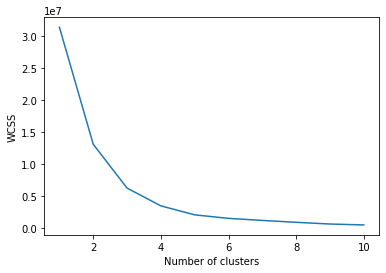

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
# Read the CSV file using Spark
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/venkatagayathrip1498@gmail.com/preprocessed_dataset-1.csv")
# Convert the Spark DataFrame to a pandas DataFrame
pdf1 = df1.toPandas()
# Extract the values for clustering
X = pdf1.iloc[:, [8,9]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

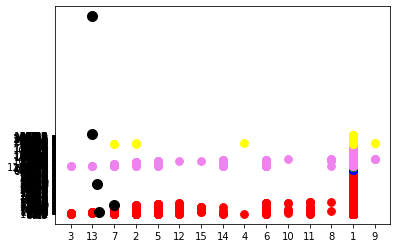

In [0]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
#plt.xlabel('Country') plt.ylabel('Revenue') plt.legend() 
plt.show()

In [0]:
from sklearn.metrics import silhouette_score
# Compute silhouette score
silhouette_avg = silhouette_score(X, y_kmeans)
print('Silhouette Score:', silhouette_avg)

Silhouette Score: 0.7762114516159576


In [0]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)
from sklearn.metrics import silhouette_score
# Compute silhouette score
silhouette_avg = silhouette_score(X, y_kmeans)
print('Silhouette Score:', silhouette_avg)

Silhouette Score: 0.8560896894850423


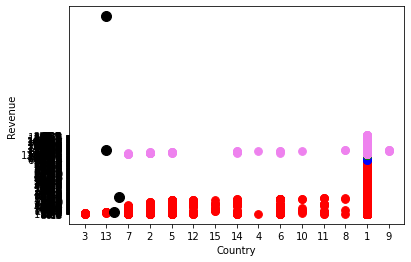

In [0]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Country') 
plt.ylabel('Revenue') 
plt.show()

In [0]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)
from sklearn.metrics import silhouette_score
# Compute silhouette score
silhouette_avg = silhouette_score(X, y_kmeans)
print('Silhouette Score:', silhouette_avg)

Silhouette Score: 0.9199717159055351


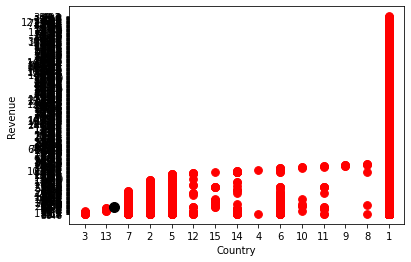

In [0]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Country') 
plt.ylabel('Revenue') 
plt.show()